**File reading**
***

In [1]:
import pandas as pd
# Dataset from - https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection
df = pd.read_csv('docs/simpsons_dataset.csv').dropna()

# imprima las primeras 5 filas
df.head()

#Cambiamos las etiquetas texutales por etiquetas numericas, esto es una buena practica cuando se construyen modelo supervisados
# df['label'] = df.label.map({'ham':0, 'spam':1})
print(df.shape)
df.head(20) # returns (rows, columns)

(131853, 2)


,raw_character_text,spoken_words
0,Miss Hoover,"No, actually, it was a little of both. Sometim..."
1,Lisa Simpson,Where's Mr. Bergstrom?
2,Miss Hoover,I don't know. Although I'd sure like to talk t...
3,Lisa Simpson,That life is worth living.
4,Edna Krabappel-Flanders,The polls will be open from now until the end ...
5,Martin Prince,I don't think there's anything left to say.
6,Edna Krabappel-Flanders,Bart?
7,Bart Simpson,Victory party under the slide!
9,Lisa Simpson,Mr. Bergstrom! Mr. Bergstrom!
10,Landlady,"Hey, hey, he Moved out this morning. He must h..."


## Text Pre Processing for embeddings

In [3]:
import gzip
import gensim
import logging

### BOW

In [4]:
def read_input(input_file):
    """This method reads the input file which is in gzip format"""
    
    logging.info("reading file {0}...this may take a while".format(input_file))
    
    with gzip.open (input_file, 'rb') as f:
        for i, line in enumerate (f): 

            if (i%10000==0):
                logging.info ("read {0} reviews".format (i))
            # do some pre-processing and return a list of words for each review text
            yield gensim.utils.simple_preprocess(line)

In [5]:
from gensim.utils import simple_preprocess

def preproccess(line):
    return simple_preprocess(line)



df['proccesed'] = df['spoken_words'].apply(preproccess)
df.head(10)

,raw_character_text,spoken_words,proccesed
0,Miss Hoover,"No, actually, it was a little of both. Sometim...","[no, actually, it, was, little, of, both, some..."
1,Lisa Simpson,Where's Mr. Bergstrom?,"[where, mr, bergstrom]"
2,Miss Hoover,I don't know. Although I'd sure like to talk t...,"[don, know, although, sure, like, to, talk, to..."
3,Lisa Simpson,That life is worth living.,"[that, life, is, worth, living]"
4,Edna Krabappel-Flanders,The polls will be open from now until the end ...,"[the, polls, will, be, open, from, now, until,..."
5,Martin Prince,I don't think there's anything left to say.,"[don, think, there, anything, left, to, say]"
6,Edna Krabappel-Flanders,Bart?,[bart]
7,Bart Simpson,Victory party under the slide!,"[victory, party, under, the, slide]"
9,Lisa Simpson,Mr. Bergstrom! Mr. Bergstrom!,"[mr, bergstrom, mr, bergstrom]"
10,Landlady,"Hey, hey, he Moved out this morning. He must h...","[hey, hey, he, moved, out, this, morning, he, ..."


In [6]:
documents = df['proccesed'].to_numpy()

In [10]:
model_skipgram = gensim.models.Word2Vec(documents, vector_size=150, window=10, min_count=2, workers=10, sg=1)
model_skipgram.train(documents,total_examples=len(documents),epochs=10)

(9562008, 12451860)

In [11]:
model_skipgram.save("word2vec150.model")

In [12]:
print(model_skipgram.wv['morning'])

[-0.26455688  0.48366925  0.28317106 -0.2567004  -0.57940596 -0.05468949
 -0.0019515   0.40001634 -0.14928535 -0.07261252 -0.04753511 -0.05392469
  0.11028362  0.5873678   0.4551598  -0.50031424  0.26233104  0.3049557
  0.0592324   0.132854   -0.40000153 -0.04411924  0.38644475  0.34983408
 -0.2331084  -0.26319748  0.178582    0.42412668 -0.42794904  0.15520044
 -0.2113742  -0.28329957 -0.29658586 -0.32013917  0.07476027 -0.6028703
  0.5145507   0.76768714 -0.1888733  -0.0583678  -0.25916234  0.5700454
 -0.65705603 -0.08936331  0.2719842  -0.0907083  -0.48071983 -0.11457248
  0.53383404  0.17692088  0.0929958   0.11537882  0.09645131  0.26533023
 -0.4259143  -0.20402     0.3991456   0.1193865  -0.07057015  0.02933059
 -0.5794868  -0.480535   -0.19465344 -0.2763817  -0.57433283 -0.1825208
 -0.57742494 -0.02612101  0.6376332  -0.47102126 -0.1106008   0.78323734
 -0.36385557 -0.16433904  0.3510747  -0.07787371 -0.19760416 -0.15484954
  0.14237837  0.16010384  0.34847054 -0.17301366  0.404

In [13]:
model_100 = gensim.models.Word2Vec (documents, vector_size=100, window=10, min_count=2, workers=10, sg=1)
model_100.train(documents,total_examples=len(documents),epochs=10)

(9562101, 12451860)

In [14]:
model_100.save("word2vec100.model")

In [15]:
print(model_100.wv['morning'])

[ 0.26531103  0.48041272 -0.4535361  -0.33318493  0.29498318 -0.5600295
 -0.17425774  0.64857036 -0.3662583  -0.5353689  -0.45071983 -0.17387272
  0.08234863  0.4467639  -0.25757992  0.00323548  0.37299505 -0.6401829
 -0.22304502 -0.52867323  0.33381617  0.14545599  0.53586316  0.15135086
  0.38130355  0.18657371 -0.51086307  0.67464525  0.42903528 -0.41818064
 -0.58104104  0.02584601  0.07423452 -0.10876928 -0.34188712  0.31555805
  0.5215705   0.80102503 -0.03367819  0.38557813  0.3128683  -0.161887
  0.00806103 -0.38996947 -0.16131349  0.16039206 -0.14081052 -0.27566636
  0.29249725 -0.24191909 -0.16993713  0.09172913  0.3834668  -0.240428
 -0.19712448  0.02599876 -0.00818744 -0.240889   -0.5189232   0.1148084
  0.12453781  0.17823608  0.03968548  0.3211822  -0.3093314   0.2789817
  0.5061518   0.2298641  -0.5989649   0.12817909 -0.9297842   0.17259412
  0.707421    0.24267676 -0.10220083  0.52559024  0.17329992  0.02298893
  0.3173834   0.02850016  0.00935061 -0.4170632  -0.0492366

In [16]:
model_50 = gensim.models.Word2Vec(documents, vector_size=50, window=10, min_count=2, workers=10, sg=1)
model_50.train(documents,total_examples=len(documents),epochs=10)

(9561144, 12451860)

In [17]:
model_50.save("word2vec50.model")


In [18]:
df.shape

(131853, 3)

## Read


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [20]:

model50 = gensim.models.Word2Vec.load("word2vec50.model")
model100 = gensim.models.Word2Vec.load("word2vec100.model")
model150 = gensim.models.Word2Vec.load("word2vec150.model")

In [21]:
model50.wv.similar_by_word('homer')

[('marge', 0.827936589717865),
 ('simpson', 0.7971497774124146),
 ('bart', 0.7808811664581299),
 ('wildcats', 0.7715546488761902),
 ('you', 0.7641118764877319),
 ('fonzie', 0.7587495446205139),
 ('toothbrush', 0.7567184567451477),
 ('brodka', 0.7545030117034912),
 ('sampson', 0.7533972859382629),
 ('mr', 0.7523989081382751)]

In [22]:
def display_closestwords_tsnescatterplot(model, word, n):
    
    arr = np.empty((0,n), dtype='f')
    word_labels = [word]

    # get close words
    close_words = model.wv.similar_by_word(word)
    
    # add the vector for each of the closest words to the array
    arr = np.append(arr, np.array([model.wv[word]]), axis=0)
    for wrd_score in close_words:
        wrd_vector = model.wv[wrd_score[0]]
        word_labels.append(wrd_score[0])
        arr = np.append(arr, np.array([wrd_vector]), axis=0)
        
    # find tsne coords for 2 dimensions
    tsne = TSNE(n_components=2, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)

    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    # display scatter plot
    plt.scatter(x_coords, y_coords)

    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
    plt.xlim(x_coords.min()+0.00005, x_coords.max()+0.00005)
    plt.ylim(y_coords.min()+0.00005, y_coords.max()+0.00005)
    plt.show()

## Graphs and analysis
***

**Vector dimension:** 50

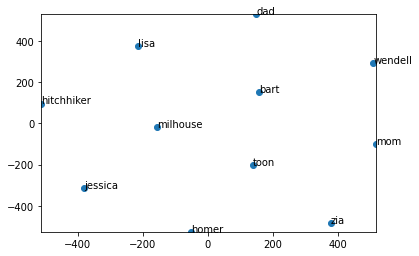

In [23]:
display_closestwords_tsnescatterplot(model50, 'bart', 50)

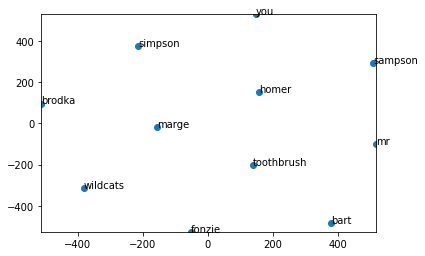

In [24]:
display_closestwords_tsnescatterplot(model50, 'homer', 50)

**Vector dimension:** 100

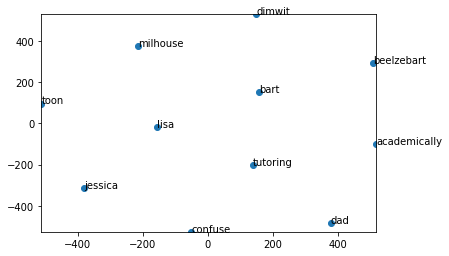

In [25]:
display_closestwords_tsnescatterplot(model100, 'bart', 100)

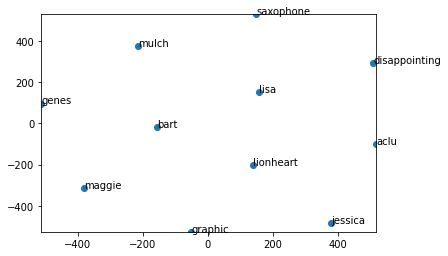

In [27]:
display_closestwords_tsnescatterplot(model100, 'lisa', 100)

**Vector size:** 150

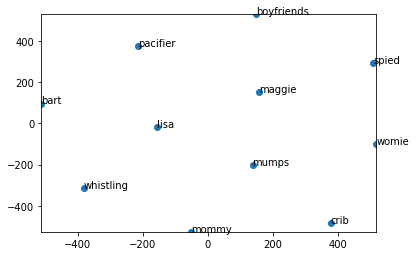

In [28]:
display_closestwords_tsnescatterplot(model150, 'maggie', 150)

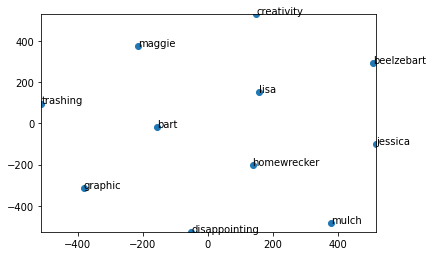

In [29]:
display_closestwords_tsnescatterplot(model150, 'lisa', 150)